In [1]:
import math
import scipy.linalg
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

### Задание 1

Решите линейную систему:
$$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 0 & 6 \\ 7 & 8 & 9 \end{bmatrix} X = \begin{bmatrix} 12 \\ 2 \\ 1 \end{bmatrix}$$

In [2]:
a = np.array([[1,2,3],[4,0,6],[7,8,9]])
b = np.array([12,2,1])

In [3]:
x = np.linalg.solve(a, b)
x

array([-9.2       ,  0.9       ,  6.46666667])

In [4]:
# проверка
a@x-b

array([-1.77635684e-15, -7.10542736e-15, -7.10542736e-15])

### Задание 2

Найдите псевдорешение:

  x + 2y –  z = 1
  
 3x – 4y      = 7
 
 8x – 5y + 2z = 12
 
 2x      – 5z = 7
 
11x + 4y – 7z = 15

In [5]:
a = np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
b = np.array([1,7,12,7,15])

In [6]:
x = np.linalg.lstsq(a, b, rcond=None)[0]
x

array([ 1.13919353, -0.90498444, -0.9009803 ])

In [7]:
# проверка
a@x-b

array([-0.76979505,  0.03751834, -0.16349019, -0.21671145,  0.21805313])

### Задание 3

Сколько решений имеет линейная система:
$$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} X = \begin{bmatrix} 12 \\ 2 \\ 1 \end{bmatrix}$$

In [8]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[12,2,1]])
c = np.concatenate((a, b.T), axis=1)

In [9]:
r1 = np.linalg.matrix_rank(a)
r2 = np.linalg.matrix_rank(c)
n = a.shape[1]
r1, r2, n

(2, 3, 3)

In [10]:
if r1 < r2:
    print("Система не имеет решений")
elif (r1 == r2) and (r1 == n):
    print("Система имеет единственное решение")
else:
    print("Система имеет бесконечное кол-во решений")

Система не имеет решений


Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [11]:
b = np.array([[1,1,1]]) # измененный вектор
c = np.concatenate((a, b.T), axis=1)

In [12]:
r1 = np.linalg.matrix_rank(a)
r2 = np.linalg.matrix_rank(c)
n = a.shape[1]
r1, r2, n

(2, 2, 3)

In [13]:
if r1 < r2:
    print("Система не имеет решений")
elif (r1 == r2) and (r1 == n):
    print("Система имеет единственное решение")
else:
    print("Система имеет бесконечное кол-во решений")

Система имеет бесконечное кол-во решений


In [14]:
x = np.linalg.lstsq(a, b.flatten(), rcond=None)[0]
x

array([-5.00000000e-01,  3.07361416e-16,  5.00000000e-01])

In [15]:
# проверка
a@x-b

array([[-4.44089210e-16, -2.22044605e-16,  0.00000000e+00]])

### Задание 4

Вычислите LU-разложение матрицы:
$$\begin{bmatrix} 1 & 2 & 3 \\ 2 & 16 & 21 \\ 4 & 28 & 73 \end{bmatrix}$$

In [16]:
a = np.array([[1,2,3],[2,16,21],[4,28,73]])

In [17]:
p, l, u = scipy.linalg.lu(a)
print(p)
print(l)
print(u)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [18]:
b = np.array([1,1,1])

In [19]:
x = np.linalg.solve(a, b)
x

array([ 1.18518519, -0.03703704, -0.03703704])

In [20]:
# проверка
a@x-b

array([0.00000000e+00, 2.22044605e-16, 4.44089210e-16])

### Задание 5

Найдите нормальное псевдорешение недоопределенной системы:

x + 2y – z = 1

8x – 5y + 2z = 12

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [21]:
a = np.array([[1,2,-1],[8,-5,2]])
b = np.array([1,12])

In [22]:
# путем несложных преобразований получаем выражение y и z через x
def Q(x):
    y = 10 * x - 14
    z = 21 * x - 29
    return (x**2 + y**2 + z**2)

In [23]:
x = scipy.optimize.minimize(Q, (0)).x[0]
y = 10 * x - 14
z = 21 * x - 29
x, y, z

(1.381918814549124, -0.18081185450876092, 0.020295105531602076)

In [24]:
# проверка
print("Норма:", x**2 + y**2 + z**2)
x = np.array([x, y, z])
a@x-b

Норма: 1.9428044280442922


array([0., 0.])

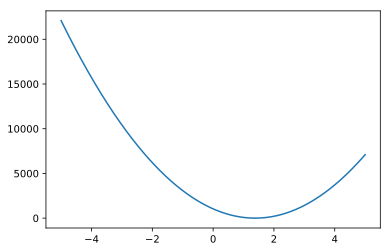

In [25]:
x = np.linspace(-5, 5, num=1000)
y = Q(x)
plt.plot(x, y)
plt.show()

In [26]:
x = np.linalg.lstsq(a, b, rcond=None)[0]
x

array([ 1.38191882, -0.18081181,  0.0202952 ])

In [27]:
# проверка
print("Норма:", x[0]**2 + x[1]**2 + x[2]**2)
a@x-b

Норма: 1.9428044280442813


array([ 2.88657986e-15, -1.77635684e-15])

### Задание 6

Найдите одно из псевдорешений вырожденной системы:
$$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} X = \begin{bmatrix} 2 \\ 5 \\ 11 \end{bmatrix}$$

In [28]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[2,5,11]])
c = np.concatenate((a, b.T), axis=1)

In [29]:
r1 = np.linalg.matrix_rank(a)
r2 = np.linalg.matrix_rank(c)
n = a.shape[1]
r1, r2, n

(2, 3, 3)

In [30]:
if r1 < r2:
    print("Система не имеет решений")
elif (r1 == r2) and (r1 == n):
    print("Система имеет единственное решение")
else:
    print("Система имеет бесконечное кол-во решений")

Система не имеет решений


In [31]:
x = np.linalg.lstsq(a, b.flatten(), rcond=None)[0]
x

array([ 1.25,  0.5 , -0.25])

In [32]:
# проверка
print("Норма:", x[0]**2 + x[1]**2 + x[2]**2)
a@x-b

Норма: 1.874999999999993


array([[-0.5,  1. , -0.5]])

Попробуйте также отыскать и нормальное псевдорешение.

In [33]:
# путем несложных преобразований получаем выражение y и z через x
def Q(x):
    y = 2.5 - 2 * x
    z = x - 1
    return (x**2 + y**2 + z**2)

In [34]:
x = scipy.optimize.minimize(Q, (0)).x[0]
y = 2.5 - 2 * x
z = x - 1
x, y, z

(0.9999999934100475, 0.500000013179905, -6.589952472602079e-09)

In [35]:
# проверка
print("Норма:", x**2 + y**2 + z**2)
x = np.array([x, y, z])
a@x-b

Норма: 1.2500000000000002


array([[0. , 1.5, 0. ]])

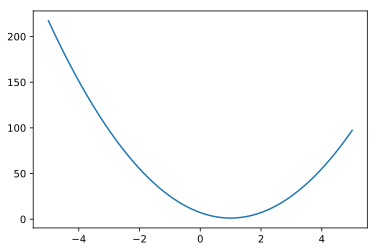

In [36]:
x = np.linspace(-5, 5, num=1000)
y = Q(x)
plt.plot(x, y)
plt.show()